線形カルマンフィルタ
（参考、wikipedia）

１、状態方程式と観測方程式

　時刻$k$におけるシステムの状態${\bf x}_k$は、時刻$k-1$の状態をもとに次のように表現される．

${\bf x}_k = {\bf A}_k {\bf x}_{k-1} + {\bf B}_k {\bf u}_k + {\bf w}_k$

　ここで、${\bf A}_k , {\bf B}_k$はシステムの時間遷移に関する線形モデル、
${\bf u}_k$は制御入力、${\bf w}_k$は平均$0$、共分散行列${\bf Q}_k$の多次元正規分布に従うノイズ（状態誤差）である．この式を状態方程式と呼ぶ．

　真の状態である${\bf x}_k$は観測不可能であるが、観測値${\bf z}_k$と以下の関係にある．
 
${\bf z}_k = {\bf H}_k {\bf x}_{k-1} + {\bf v}_k$

　ここで、${\bf H}_k$は状態空間から観測空間へ変換を行うモデルであり、${\bf v}_k$は平均$0$、共分散行列${\bf R}_k$の多次元正規分布に従うノイズ（観測誤差）である．この式を観測方程式と呼ぶ．

２、カルマンフィルタ
 
 　カルマンフィルタでは、予測と更新の2つのステップにより時刻$k$地点での時刻$k$の推定値${\hat{\bf x}_{k|k}}$を求める．予測ステップでは、状態方程式を用いて、時刻$k-1$時点における時刻$k$の予測値${\hat{\bf x}_{k|k-1}}$と予測誤差${\bf P}_{k|k-1}$を求める．更新ステップでは、観測値${\bf z}_{k}$と予測値${\hat{\bf x}_{k|k-1}}$を、観測誤差と予測誤差の大きさが小さいほど高い重みをつけて平均することで、推定値${\hat{\bf x}_{k|k}}$を求める．2つのステップは以下の式で表現される．
  
  予測

${\hat{\bf x}_{k|k-1}} = {\bf A}_k {\hat{\bf x}_{k-1|k-1}} + {\bf B}_k {\bf u}_k + {\bf w}_k$

${\bf P}_{k|k-1} = {\bf F}_{k}{\bf P}_{k-1|k-1}{\bf F}_{k}^T + {\bf G}_{k}{\bf Q}_{k}{\bf G}_{k}^T $

　更新
 
${\bf e}_{k} = {\bf z}_k - {\bf H}_k {\hat{\bf x}_{k|k-1}}$

${\bf S}_{k} = {\bf R}_k + {\bf H}_{k}{\bf R}_{k|k-1}{\bf H}_{k}^T $

${\bf K}_{k} = {\bf R}_{k|k-1}{\bf H}_{k}^T {\bf S}_{k}^{-1}$

${\hat{\bf x}_{k|k}} = {\hat{\bf x}_{k|k-1}} + {\bf K}_k {\bf e}_{k}$

${\bf P}_{k|k} = ({\bf I} - {\bf K}_{k}{\bf H}_{k}){\bf P}_{k|k-1}$

３、例題

　２次元座標を動く物体の位置$\hat{\bf x} = (x, y)$をカルマンフィルタで推定する．物体は

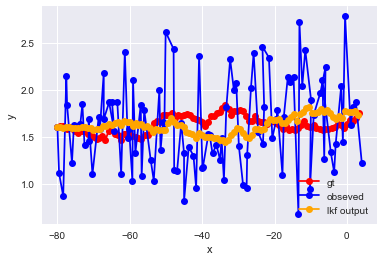

In [4]:
%matplotlib inline
from kalman_filter_r2 import plot_pos
plot_pos()

メモ

1次元で考えると